## SVM Classifier Testing
In this notebook, test a Support Vector Machine classifier from scikit learn for image classification of the sea lion chips.

In [4]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pathlib
import pickle
import random
import seaborn as sns

from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.model_selection import cross_val_predict, cross_val_score, train_test_split

##### Retrieve the arrays and labels via pickle. Assign arrays to X (our training features) and labels to y (our training target/labels)

In [5]:
with open('image_arrays.pkl', 'rb') as f:
    X = pickle.load(f)
with open('image_labels.pkl', 'rb') as f:
    y = pickle.load(f)

In [6]:
np.unique(y,return_counts=True)

(array([0, 1, 2, 3, 4]), array([2000, 2000, 2000, 2000, 2000], dtype=int64))

##### Create train test split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.12,
                                                    random_state=42,
                                                    shuffle=True)

##### Predict on subset of the test data

In [8]:
svm_clf = LinearSVC(C=1, loss='hinge')
svm_clf.fit(X,y)

C:\Users\604572\Continuum\anaconda3\envs\MaskRCNN\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=None, tol=0.0001, verbose=0)

In [9]:
print(
    "Label codes:  {'adult_females': 0, 'adult_males': 1, 'juveniles': 2, 'pups': 3, 'subadult_males': 4}"
)
print("Predictions: ", svm_clf.predict(X_test[0:20]))
print("Actual classes: ", y_test[0:20])

Label codes:  {'adult_females': 0, 'adult_males': 1, 'juveniles': 2, 'pups': 3, 'subadult_males': 4}
Predictions:  [3 4 3 3 4 2 3 1 0 4 4 4 3 3 3 3 3 4 3 0]
Actual classes:  [3, 4, 1, 2, 4, 2, 1, 1, 0, 4, 1, 4, 3, 3, 3, 1, 2, 2, 3, 2]


##### Create confusion matrix - good explanation here if unfamiliar: https://www.geeksforgeeks.org/confusion-matrix-machine-learning/

In [12]:
y_train_pred = cross_val_predict(svm_clf, X_train, y_train, cv=3)

conf_matrix = confusion_matrix(y_train, y_train_pred)
conf_matrix

C:\Users\604572\Continuum\anaconda3\envs\MaskRCNN\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\604572\Continuum\anaconda3\envs\MaskRCNN\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\604572\Continuum\anaconda3\envs\MaskRCNN\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


array([[ 335,  397,  248,  325,  491],
       [ 375,  448,  226,  232,  460],
       [ 269,  409,  206,  438,  423],
       [  94,  200,   84, 1213,  169],
       [ 345,  445,  244,  214,  510]], dtype=int64)

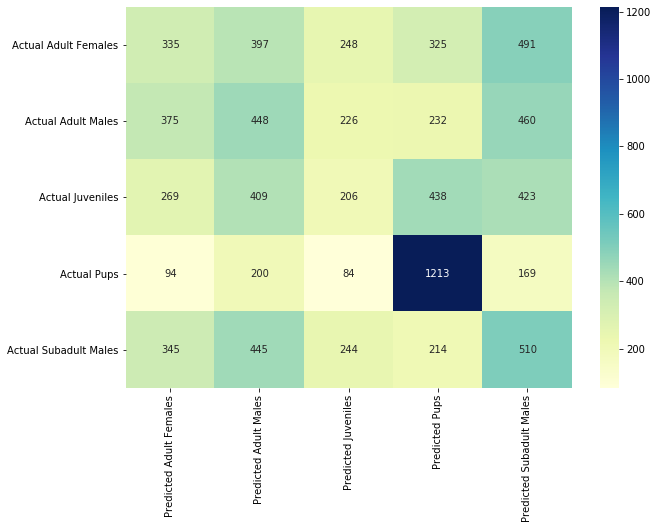

In [13]:
label_codes = {'adult_females': 0, 'adult_males': 1, 'juveniles': 2, 'pups': 3, 'subadult_males': 4}
classes = ['Adult Females', 'Adult Males', 'Juveniles', 'Pups', 'Subadult Males']
df_conf_matrix = pd.DataFrame(conf_matrix, index = [f'Actual {c}' for c in classes],
                             columns = [f'Predicted {c}' for c in classes])
plt.figure(figsize=(10,7))
plt.xticks(rotation=90)
sns.heatmap(df_conf_matrix,  cmap="YlGnBu", annot=True, fmt='d')

In [14]:
# with test
y_pred = cross_val_predict(svm_clf, X_test, y_test, cv=3)

conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

C:\Users\604572\Continuum\anaconda3\envs\MaskRCNN\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\604572\Continuum\anaconda3\envs\MaskRCNN\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\604572\Continuum\anaconda3\envs\MaskRCNN\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


array([[ 27,  34,  59,  47,  37],
       [ 23,  49,  70,  46,  71],
       [ 24,  26,  84,  77,  44],
       [ 11,  15,  52, 153,   9],
       [ 26,  46,  74,  25,  71]], dtype=int64)

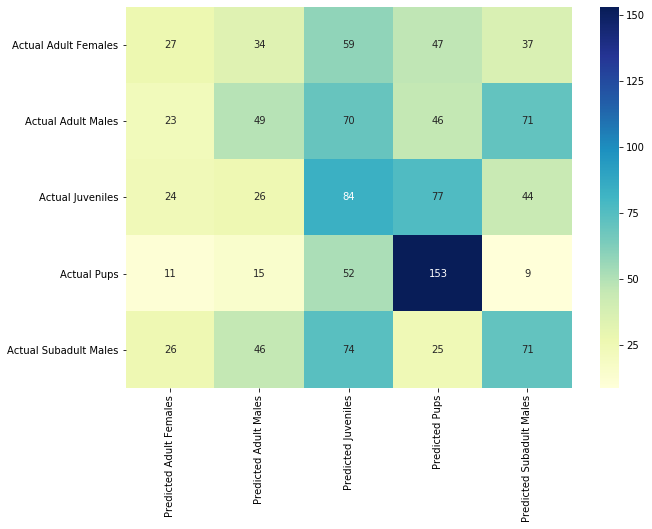

In [15]:
label_codes = {'adult_females': 0, 'adult_males': 1, 'juveniles': 2, 'pups': 3, 'subadult_males': 4}
classes = ['Adult Females', 'Adult Males', 'Juveniles', 'Pups', 'Subadult Males']
conf_matrix = pd.DataFrame(conf_matrix, index = [f'Actual {c}' for c in classes],
                             columns = [f'Predicted {c}' for c in classes])
plt.figure(figsize=(10,7))
plt.xticks(rotation=90)
sns.heatmap(conf_matrix,  cmap="YlGnBu", annot=True, fmt='d')

### Scoring Metrics

##### Mean accuracy

In [18]:
print("Mean accuracy score for SVM classifier: ", \
      cross_val_score(svm_clf, X_train, y_train, cv=3, scoring='accuracy').mean())

C:\Users\604572\Continuum\anaconda3\envs\MaskRCNN\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\604572\Continuum\anaconda3\envs\MaskRCNN\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Mean accuracy score for Random Forest Classifier:  0.2669247743036651


C:\Users\604572\Continuum\anaconda3\envs\MaskRCNN\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


##### F1 Scores

In [19]:
f1_score(y_train, y_train_pred, average=None)

array([0.20846297, 0.24615385, 0.14965492, 0.58010521, 0.26764629])